In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.patheffects import PathPatchEffect, SimpleLineShadow, Normal

In [2]:
df = pd.read_excel("Sharada_Monthly_report_July_23.xlsx")

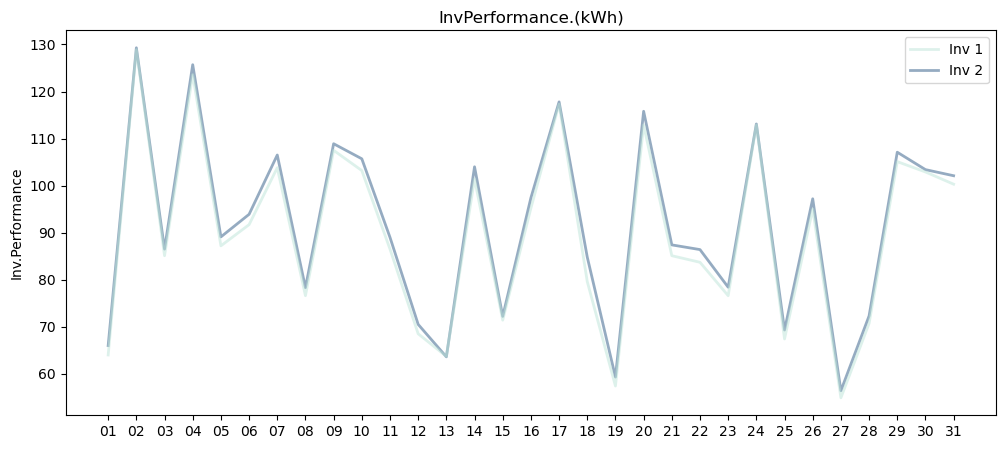

In [3]:
fig, ax = plt.subplots(figsize=(12, 5))
#plt.plot(df['Date'], df['Inv 1'], linestyle='solid', color='#bce4d8', linewidth=1, label='Inv 1', zorder=2)
#plt.plot(df['Date'], df['Inv 2'], linestyle='solid', color='#2c5985', linewidth=1, label='Inv 2', zorder=1)
# Add shadows by plotting lines with reduced opacity and slight offsets
plt.plot(df['Date'], df['Inv_1'], linestyle='solid', color='#bce4d8', linewidth=2, alpha=0.5,label='Inv 1', zorder=2)
plt.plot(df['Date'], df['Inv_2'], linestyle='solid', color='#2c5985', linewidth=2, alpha=0.5,label='Inv 2', zorder=1)

plt.xlabel('')
plt.ylabel('Inv.Performance')
plt.title('InvPerformance.(kWh)')
ax.set_xticks(df['Date'].dt.date)
ax.set_xticklabels(df['Date'].dt.strftime('%d'), rotation=0)

# Add a legend
plt.legend(loc='best')
#plt.savefig('Inv_Performance.svg', format='svg')
plt.savefig('Inv_Performance.pdf', bbox_inches='tight')

plt.show()

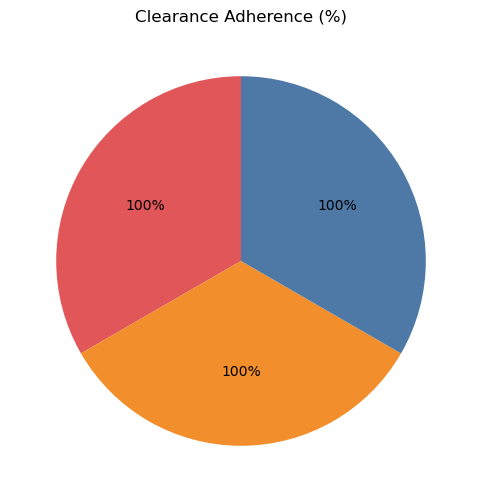

In [4]:
import matplotlib.pyplot as plt

labels = ['Cycle 1 Adherence', 'Cycle 2 Adherence', 'Cycle 3 Adherence']
sizes = [100, 100, 100]
colors = ['#e15759', '#f28e2b', '#4e79a7']
fig, ax = plt.subplots(figsize=(6, 6))

def autopct_format(pct):
    # Calculate the total size of all segments
    total = sum(sizes)
    # Calculate the size of the current segment as an integer
    val = int(round(pct * total / 100.0))
    return f'{val}'+'%'

# Plot the pie chart
ax.pie(sizes, labels=None, colors=colors, startangle=90, autopct=autopct_format)

# Add labels as a legend
#ax.legend(labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Clearance Adherence (%)')


plt.savefig('pie2.jpg', dpi=300, bbox_inches='tight',orientation='landscape')

plt.show()


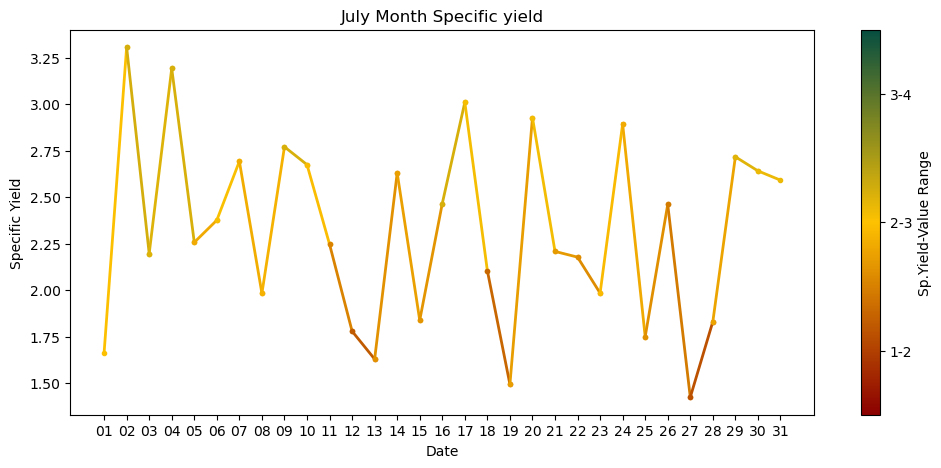

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

Specific_Yield = df['Sp_Yield']
dates = df['Date'].dt.strftime('%d')

# Define your x and y values
x = dates
y = Specific_Yield  # Replace with your actual y-values

# Define a custom colormap with the specified colors
colors = ['#8B0001', '#FEC201', '#064E41']
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
norm = plt.Normalize(1, 4)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

for i in range(len(x) - 1):
    x_segment = [x[i], x[i + 1]]
    y_segment = [y[i], y[i + 1]]
    color = cmap(norm(np.mean(y_segment)))
    ax.plot(x_segment, y_segment, color=color, linewidth=2,marker='.')
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # You need this line for the colorbar to work properly
cbar = plt.colorbar(sm, ax=ax, label='Sp.Yield-Value Range')

cbar.set_ticks([1.5, 2.5, 3.5])  # Set the ticks in the middle of each y-value range
cbar.set_ticklabels(['1-2', '2-3', '3-4'])
plt.xlabel('Date')
plt.ylabel('Specific Yield')
plt.title('July Month Specific yield')
plt.savefig('specific_yield.svg', format='svg')
plt.show()


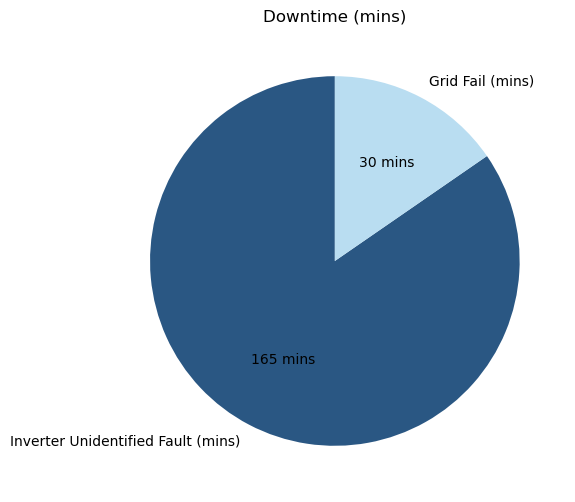

In [6]:
labels = ['Inverter Unidentified Fault (mins)', 'Grid Fail (mins)']
colors = ['#2a5783', '#b9ddf1']
sizes = [165, 30]
explode = (0.1, 0)

plt.figure(figsize=(6, 6))

def my_autopct(pct):
    total = sum(sizes)
    val = int(round(pct*total/100.0))
    return f'{val} mins'

plt.pie(sizes, labels=labels, colors=colors, autopct=my_autopct, startangle=90)

plt.title('Downtime (mins)')
plt.savefig('pie1.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')

plt.show()

In [7]:
dates = df['Date'].dt.strftime('%d')
expected_gen = df['Expected_Gen_(kWh)']
actual_gen = df['Generation (kWh)']

#colors = ['#FF3333', '#FFD633', '#33FF33']
#cmap = LinearSegmentedColormap.from_list('BrightRedGoldGreen', colors, N=256)
#cmap = LinearSegmentedColormap.from_list('RedGoldGreen', colors, N=256)
#cmap = LinearSegmentedColormap.from_list('RdYlGn', colors, N=256)

plt.get_cmap("Viridis")

min_gen = actual_gen.min()
max_gen = actual_gen.max()
y_ranges = [(min_gen + i * (max_gen - min_gen) / 5, min_gen + (i + 1) * (max_gen - min_gen) / 5) for i in range(5)]

fig, ax1 = plt.subplots(figsize=(15, 9))
ax2 = ax1.twinx()

ax1.set_xlabel('')
ax1.set_title('July-23 Generation (kWh)')
color_index = 113.1
for date, act_gen in zip(dates, actual_gen):
    for i, (y_min, y_max) in enumerate(y_ranges):
        if y_min <= act_gen <= y_max:
            color_index = i
            break
    color = cmap(color_index / (len(y_ranges) - 1))
    ax1.bar(date, act_gen, color=color, alpha=0.5)


ax2.plot(dates, expected_gen, color='blue', label='Expected Gen.(kWh)')
ax1.set_ylabel('Actual Generation (kWh)')
ax2.set_ylabel('Expected Generation (kWh)')
ax1.legend(['Actual Gen.(kWh)'],bbox_to_anchor=(-0.01,-0.2),loc='lower left', frameon=False)
ax2.legend(['Expected Gen.(kWh)'],bbox_to_anchor=(0.98,-0.2 ), loc='lower right', frameon=False)

plt.xticks(rotation=30)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax2, label='Actual Generation (kWh), Normalized',ticks=[0, 1], fraction=0.01, orientation='horizontal', pad=0.04,aspect=35)

#plt.tight_layout()
#plt.savefig('output_plot.png', dpi=100)
plt.savefig('firstplot.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')
plt.show()

KeyError: 'Expected_Gen_(kWh)'

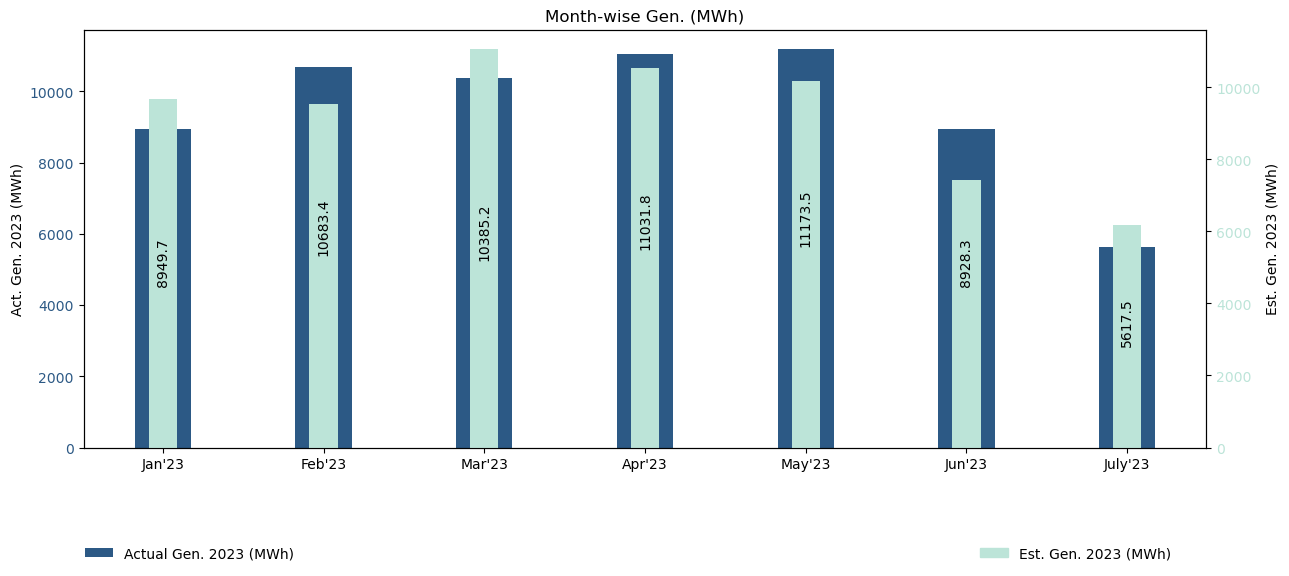

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

Act_Gen = [8949.7, 10683.4, 10385.2, 11031.8, 11173.5, 8928.3, 5617.5]
act_gen = [round(value, 2) for value in Act_Gen]

Estimate_Gen = [9681, 9535, 11048, 10525, 10185, 7437, 6189]

Year = ['Jan-23', 'Feb-23', 'Mar-23', 'Apr-23', 'May-23', 'Jun-23', 'July-23']
years = [date.replace('-', "'") for date in Year]

fig, ax1 = plt.subplots(figsize=(13, 6))

ax1.bar(x=years, height=act_gen, width=0.35, align='center', color='#2c5985', label='Actual Gen. 2023 (MWh)')
ax1.set_ylabel('Act. Gen. 2023 (MWh)', color='black')
ax1.tick_params(axis='y', labelcolor='#2c5985')

ax2 = ax1.twinx()

for i, est_gen in enumerate(Estimate_Gen):
    ax2.bar(x=years[i], height=est_gen, width=0.35 / 2, align='center', color='#bce4d8')
    ax2.text(i, act_gen[i] // 2, str(act_gen[i]), va='bottom', ha='center', rotation=90, color='black', fontsize=10)

legend_elements = [Patch(color='#bce4d8', label='Est. Gen. 2023 (MWh)')]
ax2.legend(handles=legend_elements, bbox_to_anchor=(0.98, -0.3), loc='lower right', frameon=False)

ax2.set_ylabel('Est. Gen. 2023 (MWh)', color='black')
ax2.tick_params(axis='y', labelcolor='#bce4d8')

ax1.legend(bbox_to_anchor=(-0.01, -0.3), loc='lower left', frameon=False)

plt.title('Month-wise Gen. (MWh)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('month-wise-gen.svg', format='svg')
plt.show()


In [ ]:
y = df['Sp Yield']
x = df['Date'].dt.strftime('%d')
color_ranges = [(1, 1.6), (1.6, 2.2), (2.2, 2.8), (2.8, 3.4), (3.4, 4)]
colors = ['#bd2b3e', '#ef774c', '#f3d166', '#22773f','darkgreen']

cmap = LinearSegmentedColormap.from_list('custom', list(zip(np.linspace(0, 1, len(colors)), colors)))
cmap = plt.get_cmap('RdYlGn')
fig, ax = plt.subplots(figsize=(13, 6))

# Plot the line with colors based on the y-value ranges
for i in range(len(x) - 1):
    x_segment = [x[i], x[i + 1]]
    y_segment = [y[i], y[i + 1]]
    #Find the index of the color range that the y-value falls into
    for j, (y_min, y_max) in enumerate(color_ranges):
        if y_min <= y_segment[0] < y_max:
            color = cmap(j / (len(color_ranges) - 1))  # Interpolate color based on the range index
            break

    ax.plot(x_segment, y_segment, color=color, linewidth=2, marker='.', markersize=8)

# Create a color bar legend
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])  # You need this line for the colorbar to work properly
cbar = plt.colorbar(sm, ax=ax, label='Sp.Yield-Value Range')

# Set the color bar ticks and labels
cbar.set_ticks(np.linspace(0, 1, len(color_ranges)))
cbar.set_ticklabels([f'{y_min}-{y_max}' for y_min, y_max in color_ranges])
plt.xlabel('')
plt.ylabel('Specific Yield')
plt.title('July Month Specific yield')
plt.savefig('specific_yield_colored_ranges.svg', format='svg')
plt.savefig('plot.jpg', dpi=200, bbox_inches='tight',orientation ='landscape')


# Show the plot
plt.show()

In [ ]:
x = df['Date'].dt.strftime('%d')
y1 = df['Generation (kWh)']
y2 = df['Expected Gen.(kWh)']

cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label='Some Units')

colormap = plt.get_cmap('RdYlGn')
start_value = 111.3 #Min Generated Value
end_value = 258.2 #Max Generated Value
range_width = (end_value - start_value) / 5
colors = [colormap((val - start_value) / range_width) for val in y1]

fig, ax1 = plt.subplots(figsize=(15, 8)) #Graph size adjusting

bars1 = ax1.bar(x, y1, color=colors, label='Y1', alpha=0.7)

for i, val in enumerate(y1):
    ax1.text(i, val//2, str(val), va='bottom', ha='center', rotation=90, color='black', fontsize=10)
ax1.legend(['Actual Gen.(kWh)'],bbox_to_anchor=(-0.01,-0.2),loc='lower left', frameon=False)

#ax1.set_xlabel('')
ax1.set_ylabel('Generation(kWh)')
ax1.tick_params(axis='y')
ax1.set_title('July_23Generation(kWh)')

ax2 = ax1.twinx()

bars2 = ax2.plot(x, y2, color=colors, label='Y2', alpha=0.7)
ax2.legend(['Expected Gen.(kWh)'],bbox_to_anchor=(0.98,-0.2 ), loc='lower right', frameon=False)  

ax2.set_ylabel('ExpectedGen.(kWh)')
ax2.tick_params(axis='y')

bars = bars1 + bars2
labels = [bar.get_label() for bar in bars]
plt.savefig('plot.jpg', dpi=200, bbox_inches='tight',orientation ='landscape')


plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

Specific_Yield = df['Sp_Yield']
dates = df['Date'].dt.strftime('%d')

x = dates
y = Specific_Yield  # Replace with your actual y-values
dy = np.diff(y)

norm = Normalize(vmin=dy.min(), vmax=dy.max())
colormap = plt.get_cmap('viridis_r')
fig, ax = plt.subplots(figsize=(13, 5))

# Plot the line with a colormap based on the differences
for i in range(len(x) - 1):
    color = colormap(norm(dy[i]))
    ax.plot(x[i:i+2], y[i:i+2], color=color, linewidth=2,marker='.', markersize=6)

cbar = plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label='Sp.Yield-Value Range')
cbar.set_label('Sp.Yield-Value Range', rotation=270, labelpad=10)

plt.xlabel('Date')
plt.ylabel('Specific Yield')
plt.title('July Month Specific yield')


plt.show()


In [ ]:
dates = df['Date'].dt.strftime('%d')
Specific_Yield = df['Sp_Yield']
x=dates
y=Specific_Yield

#colors = ['#FF3333', '#FFD633', '#33FF33']
#cmap = LinearSegmentedColormap.from_list('BrightRedGoldGreen', colors, N=256)
#cmap = LinearSegmentedColormap.from_list('RedGoldGreen', colors, N=256)
#cmap = LinearSegmentedColormap.from_list('RdYlGn', colors, N=256)

plt.get_cmap("RdYlGn")

min_gen = actual_gen.min()
max_gen = actual_gen.max()
y_ranges = [(min_gen + i * (max_gen - min_gen) / 5, min_gen + (i + 1) * (max_gen - min_gen) / 5) for i in range(5)]

fig, ax = plt.subplots(figsize=(15, 9))
ax.set_xlabel('')
ax.title('July Month Specific yield')color_index = 113.1
for x,y in zip(x,y):
    for i, (y_min, y_max) in enumerate(y_ranges):
        if y_min <= act_gen <= y_max:
            color_index = i
            break
    color = cmap(color_index / (len(y_ranges) - 1))
    ax1.bar(date, act_gen, color=color, alpha=0.5)


ax2.plot(dates, expected_gen, color='blue', label='Expected Gen.(kWh)')
ax1.set_ylabel('Actual Generation (kWh)')
ax2.set_ylabel('Expected Generation (kWh)')
ax1.legend(['Actual Gen.(kWh)'],bbox_to_anchor=(-0.01,-0.2),loc='lower left', frameon=False)
ax2.legend(['Expected Gen.(kWh)'],bbox_to_anchor=(0.98,-0.2 ), loc='lower right', frameon=False)

plt.xticks(rotation=30)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Actual Generation (kWh), Normalized',ticks=[0, 1], fraction=0.01, orientation='horizontal', pad=0.04,aspect=35)

#plt.tight_layout()
#plt.savefig('output_plot.png', dpi=100)
plt.savefig('firstplot.jpg', dpi=300, bbox_inches='tight',orientation ='landscape')
plt.show()